In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df.shape

(5572, 5)

#### We will be doing:

1. Data Cleaning
2. EDA - Exploratory Data Analysis - an approach to analyze the data using visual techniques.
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Web Application Implementation

## Data Cleaning

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
# Dropping last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [31]:
df.sample(5)

,v1,v2
4451,ham,I've told you everything will stop. Just dont ...
2182,ham,PS U no ur a grown up now right?
608,ham,Neva mind it's ok..
1053,ham,Jay's getting really impatient and belligerent
1301,ham,I tot u reach liao. He said t-shirt.


In [32]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(3)

,target,text
3612,ham,Depends on individual lor e hair dresser say p...
3296,spam,Todays Voda numbers ending 5226 are selected t...
4978,ham,Spending new years with my brother and his fam...


In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [34]:
df['target'] = encoder.fit_transform(df['target']) # ham=0 spam=1 | Label with numbers

In [35]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
# finding missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [37]:
#check for duplicate values
df.duplicated().sum()

403

In [38]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [39]:
# check again for number of duplciates
df.duplicated().sum()

0

In [40]:
df.shape

(5169, 2)

## EDA
(Supervised ML)

In [41]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
df.value_counts('target')  # gives values : count

target
0    4516
1     653
dtype: int64

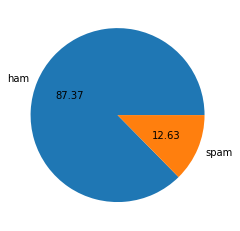

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f")
plt.show() # to remove extra info that comes with the plot

In [44]:
# Since % of spam and ham are very different - Data is Imbalanced!

In [45]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/nishant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
# we gonna add new cols: 1. no. of chars 2. no of words 3. no. of sentences

In [47]:
df['num_chars']=df['text'].apply(len) # getting no. of characters

In [49]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [50]:
# no. of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [51]:
# no. of sentences
df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [52]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df[['num_chars', 'num_words', 'num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [54]:
df[df['target']==0][['num_chars', 'num_words', 'num_sent']].describe() # HAM messages

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [55]:
df[df['target']==1][['num_chars', 'num_words', 'num_sent']].describe() # SPAM messages

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [56]:
import seaborn as sns

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

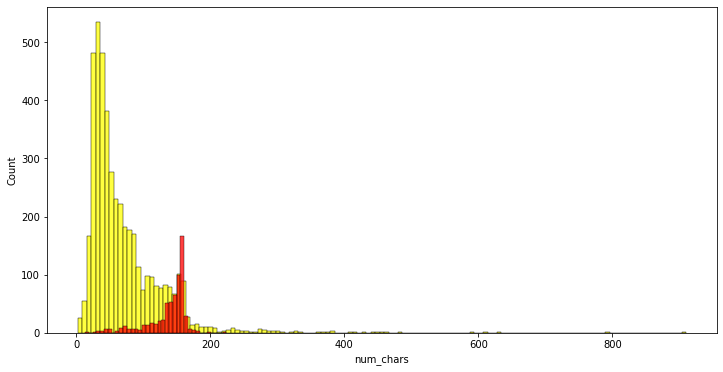

In [60]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_chars'], color='yellow') # HAM
sns.histplot(df[df['target']==1]['num_chars'], color='red') # SPAM

<AxesSubplot:xlabel='num_words', ylabel='Count'>

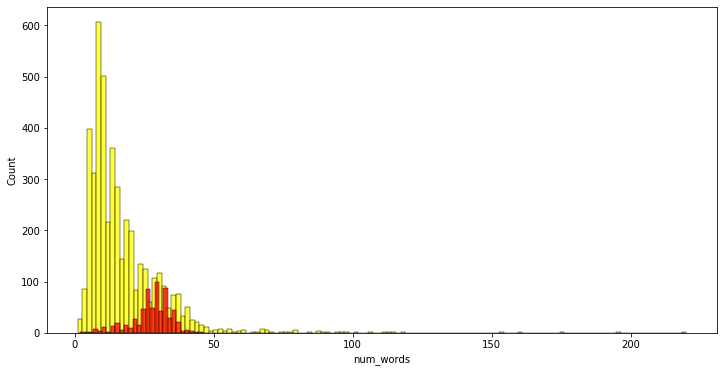

In [61]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_words'], color='yellow') # HAM
sns.histplot(df[df['target']==1]['num_words'], color='red') # SPAM

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

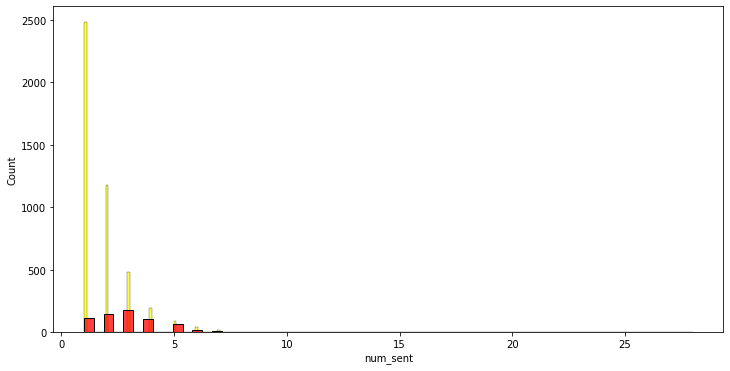

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target']==0]['num_sent'], color='yellow') # HAM
sns.histplot(df[df['target']==1]['num_sent'], color='red') # SPAM

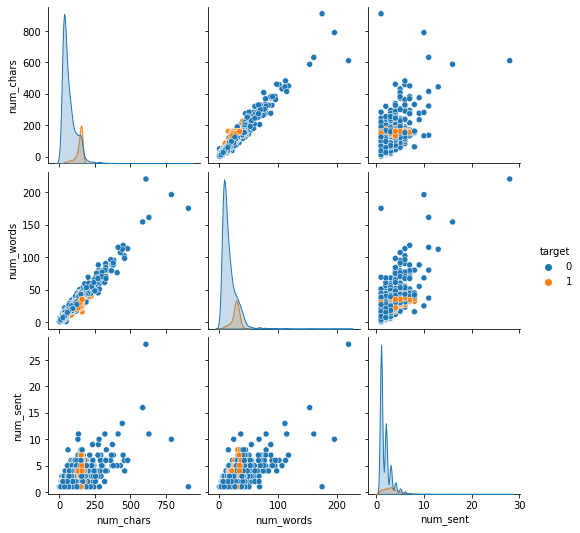

In [63]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

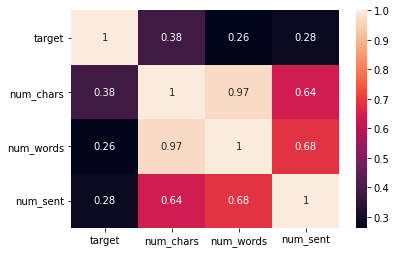

In [67]:
sns.heatmap(df.corr(), annot=True)

In the above heatmap, we can see correlations of different parameters with each other, and best would be to take num_chars as the param. since correlation is really good.

## Data Preprocessing

- Lower case
- Tokenzisation
- Removing special char.
- Removing stop words and punct.
- Stemming

In [93]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text=text.lower() # lowercase
    text=nltk.word_tokenize(text) # tokens
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:] # we need to clone the list. Not directly assign
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)

transform_text("Hello How are you doing? Do you know that kuala orton just escaped and sheila danced :)")

'hello know kuala orton escap sheila danc'

In [94]:
df['transformed_text']=df['text'].apply(transform_text)

In [95]:
df.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [96]:
# Lets Create a Word Cloud!! - OOPS Mission Failed! Try Again

In [100]:
trans_text=df[df['target']==1]['transformed_text'].tolist() # SPAM

In [101]:
spam_corpus=[]

for msg in trans_text:
    for word in msg.split():
        spam_corpus.append(word)

In [102]:
len(spam_corpus)

9939

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


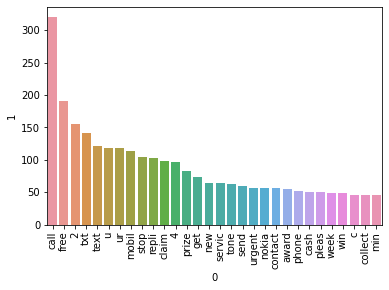

In [110]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [112]:
trans_text0=df[df['target']==0]['transformed_text'].tolist() # HAM

In [113]:
ham_corpus=[]

for msg in trans_text:
    for word in msg.split():
        ham_corpus.append(word)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


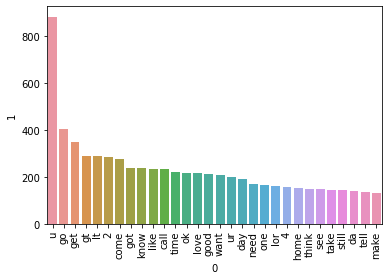

In [114]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

##### We will use Naive Bayes Model Here!  Since, Naive Bayes performs great on textual data:

## Model Building:

In [118]:
# We will need to convert TEXT to VECTORS,
# Techniques to do so - Bag of Words - TFIDF - Word2Vec
# We'll start with bagOfWords

In [142]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # bag of Words

cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [143]:
X = cv.fit_transform(df['transformed_text']).toarray()
X2 = tfidf.fit_transform(df['transformed_text']).toarray()
print(X.shape)
print(X2.shape)

(5169, 6708)
(5169, 6708)


In [123]:
Y = df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [128]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [139]:
gnb.fit(X_train, Y_train)
y_predict = gnb.predict(X_test)
print(accuracy_score(Y_test, y_predict))
print(confusion_matrix(Y_test, y_predict))
print(precision_score(Y_test, y_predict))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [140]:
mnb.fit(X_train, Y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_predict2))
print(confusion_matrix(Y_test, y_predict2))
print(precision_score(Y_test, y_predict2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [141]:
bnb.fit(X_train, Y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_predict3))
print(confusion_matrix(Y_test, y_predict3))
print(precision_score(Y_test, y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2, random_state=2)

In [145]:
gnb.fit(X_train, Y_train)
y_predict = gnb.predict(X_test)
print(accuracy_score(Y_test, y_predict))
print(confusion_matrix(Y_test, y_predict))
print(precision_score(Y_test, y_predict))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [146]:
mnb.fit(X_train, Y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_predict2))
print(confusion_matrix(Y_test, y_predict2))
print(precision_score(Y_test, y_predict2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [147]:
bnb.fit(X_train, Y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_predict3))
print(confusion_matrix(Y_test, y_predict3))
print(precision_score(Y_test, y_predict3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


We have chose TFIDF-MNB here since, precision is 1, we are not considering accuracy more than precision here, since we have imbalanced data.

In [149]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [150]:
# We can improve the results by changing the hyperparams - Need Good Knowledge for that! 😃